In [16]:
# Data
import pickle

# Helpful 
import tqdm

# Visualization
import matplotlib.pyplot as plt

# My Methods
from src.utils.CRPS import *
from src.utils.data_split import *
from src.models.EMOS import *
import data.raw.load_data_raw as ldr
import data.processed.load_data_processed as ldp
import data.processed.load_data_processed_denormed as ldpd
from src.models.CRPS_baseline.CRPS_load import *

### 1. Load data

In [2]:
test_t2m_sw10_denormed = ldpd.load_data_t2m_ws10_test_proc_denorm()

In [3]:
test_t2m_ws10_denormed[0]

<xarray.Dataset>
Dimensions:         (forecast_date: 357, lead_time: 32, lat: 120, lon: 130,
                     mean_std: 2)
Dimensions without coordinates: forecast_date, lead_time, lat, lon, mean_std
Data variables:
    t2m_test        (forecast_date, lead_time, lat, lon, mean_std) float32 ...
    t2m_test_truth  (forecast_date, lead_time, lat, lon) float32 ...

In [4]:
test_t2m_ws10_denormed[1]

<xarray.Dataset>
Dimensions:          (forecast_date: 357, lead_time: 32, lat: 120, lon: 130,
                      mean_std: 2)
Dimensions without coordinates: forecast_date, lead_time, lat, lon, mean_std
Data variables:
    ws10_test        (forecast_date, lead_time, lat, lon, mean_std) float32 ...
    ws10_test_truth  (forecast_date, lead_time, lat, lon) float32 ...

In [5]:
test_t2m_ws10_denormed[0].t2m_test.isel(lead_time = 31)

<xarray.DataArray 't2m_test' (forecast_date: 357, lat: 120, lon: 130,
                              mean_std: 2)>
[11138400 values with dtype=float32]
Dimensions without coordinates: forecast_date, lat, lon, mean_std

### 2. Load CRPS Score test

In [45]:
t2m_crps_score_array = crps_load_lead_lat_lon('t2m')

In [42]:
# If I want to visualize the CRPS for ws10 variable
# t2m_crps_score_array = crps_load_lead_lat_lon('ws10')

###  3. CRPS scores worse with lead_time?

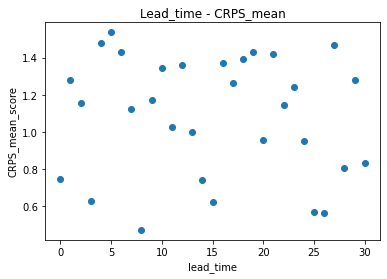

In [43]:
# Visualization Lead_time - CRPS_mean
t2m_crps_score_lead_time_mean = []
for i in range(len(t2m_crps_score_array)):
    t2m_crps_score_lead_time_mean.append(t2m_crps_score_array[i].mean())
    
fig, ax = plt.subplots()
ax.scatter(range(31), t2m_crps_score_lead_time_mean)
ax.set_title('Lead_time - CRPS_mean')
ax.set_xlabel('lead_time')
ax.set_ylabel('CRPS_mean_score')
plt.show()

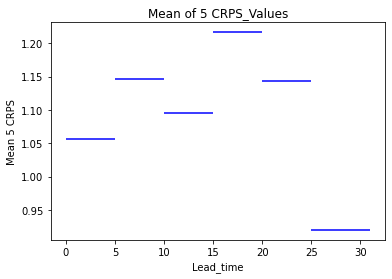

In [44]:
chunks = [t2m_crps_score_lead_time_mean[i:i+5] for i in range(0, 25, 5)] + [t2m_crps_score_lead_time_mean[-6:]]
t2m_crps_score_lead_time_mean_5 = [np.mean(chunk) for chunk in chunks]

fig, ax = plt.subplots()

# Plot horizontal lines
for i, mean in enumerate(t2m_crps_score_lead_time_mean_5):
    if i != len(t2m_crps_score_lead_time_mean_5) - 1:
        ax.hlines(mean, i*5, i*5+5, colors='b')
    else:  # the last line should span 6 points
        ax.hlines(mean, i*5, i*5+6, colors='b')

# Set the title and labels
ax.set_title('Mean of 5 CRPS_Values')
ax.set_xlabel('Lead_time')
ax.set_ylabel('Mean 5 CRPS')

# Show the plot
plt.show()